In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline
#%matplotlib qt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks

from random import random

In [2]:
file_path='data4.csv'
df = pd.read_csv(file_path,sep=";",header=[0],skiprows=0,na_values=['Missing','nan','Offln'])
#df = df[0::30]
df.head()

,timestamp,1_GORKA +2/+4: u09 S5 Темп degc,1_GORKA +2/+4: u69 Sair Темп degc,1_GORKA +2/+4: --- EKC состояние,3_GORKA 0/+2: --- EKC состояние,3_GORKA 0/+2: u69 Sair Темп degc,3_GORKA 0/+2: u09 S5 Темп degc,4_GORKA +2/+4: --- EKC состояние,4_GORKA +2/+4: u69 Sair Темп degc,4_GORKA +2/+4: u09 S5 Темп degc,...,7_GORKA +2/+4: --- EKC состояние,7_GORKA +2/+4: u69 Sair Темп degc,7_GORKA +2/+4: u09 S5 Темп degc,111_MT_AG: Sc3 air on cond. degc,111_MT_AG: Cond running cap. %,111_MT_AG: Cond. reference Bar,111_MT_AG: Cond. ctrl. pressure Bar,111_MT_AG: Comp. 2 status,111_MT_AG: Comp. 1 status,111_MT_AG: Control pressure Bar
0,2020-11-01 00:00:00,-3.00,1.39,0.0,0.0,0.28,-3.28,11.0,2.72,5.28,...,0.0,3.28,-0.39,6.22,0.0,11.24,11.05,5.0,16.0,4.20
1,2020-11-01 00:02:00,-3.00,0.89,11.0,14.0,0.28,-3.28,14.0,3.78,5.72,...,0.0,3.28,-0.39,6.22,26.0,11.24,10.71,5.0,16.0,4.14
2,2020-11-01 00:04:00,-1.39,0.89,11.0,14.0,0.28,-0.78,14.0,3.39,6.00,...,0.0,2.28,-1.61,6.22,26.0,11.24,10.71,5.0,16.0,4.28
3,2020-11-01 00:06:00,-0.11,1.50,11.0,14.0,0.61,0.00,14.0,5.28,6.61,...,11.0,1.72,-2.11,6.22,0.0,11.24,9.76,5.0,16.0,3.76
4,2020-11-01 00:08:00,0.89,2.28,11.0,14.0,1.00,0.00,14.0,6.22,7.22,...,11.0,1.72,-0.72,6.22,0.0,11.24,10.06,5.0,16.0,2.74


In [3]:
print(df.dtypes)

timestamp                               object
1_GORKA +2/+4: u09 S5 Темп degc        float64
1_GORKA +2/+4: u69 Sair Темп degc      float64
1_GORKA +2/+4: --- EKC состояние       float64
3_GORKA 0/+2: --- EKC состояние        float64
3_GORKA 0/+2: u69 Sair Темп degc       float64
3_GORKA 0/+2: u09 S5 Темп degc         float64
4_GORKA +2/+4: --- EKC состояние       float64
4_GORKA +2/+4: u69 Sair Темп degc      float64
4_GORKA +2/+4: u09 S5 Темп degc        float64
5_GORKA +2/+4: --- EKC состояние       float64
5_GORKA +2/+4: u69 Sair Темп degc      float64
5_GORKA +2/+4: u09 S5 Темп degc        float64
6_GORKA +2/+4: --- EKC состояние       float64
6_GORKA +2/+4: u69 Sair Темп degc      float64
6_GORKA +2/+4: u09 S5 Темп degc        float64
7_GORKA +2/+4: --- EKC состояние       float64
7_GORKA +2/+4: u69 Sair Темп degc      float64
7_GORKA +2/+4: u09 S5 Темп degc        float64
111_MT_AG: Sc3 air on cond. degc       float64
111_MT_AG: Cond running cap. %         float64
111_MT_AG: Co

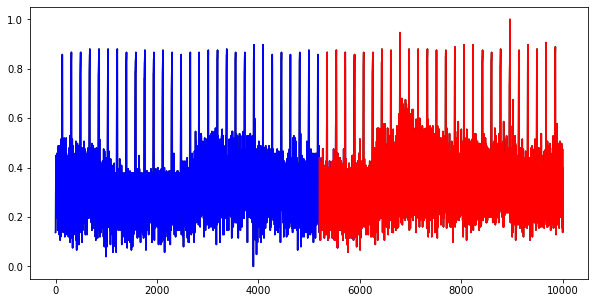

In [4]:
n_point=800
fn_tr=6000
st_test=fn_tr-n_point
fn_test=10000
len_f=10000

Ft = df['1_GORKA +2/+4: u09 S5 Темп degc']
scaler = MinMaxScaler(feature_range=(0, 1))
F=np.array(Ft[:len_f])
F = F.reshape(-1, 1)
F = scaler.fit_transform(F)
F_tr = F[:fn_tr]
F_test = F[st_test:]
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:fn_tr],F_tr, 'b')
plt.plot(np.r_[st_test:fn_test],F_test, 'r')
plt.show()

In [5]:
#Предобработка исходных данных в формат, понимаемый слоем LSTM-сети, в виде «порций» (batches) для обучения/валидации
from keras.preprocessing.sequence import TimeseriesGenerator
data_gen_tr = TimeseriesGenerator(F_tr, F_tr, length=n_point, sampling_rate=1, batch_size=fn_tr)
batch_0_tr = data_gen_tr[0]
x_tr, y_tr = batch_0_tr # вход и обучающий выход для сети
print(x_tr.shape) #Точки обучения
xx_tr=np.reshape(x_tr, (x_tr.shape[0], 1, x_tr.shape[1]))
yy_tr=y_tr
print(xx_tr.shape) # меняем местами размерности
print(yy_tr.shape) #

(5200, 800, 1)
(5200, 1, 800)
(5200, 1)


In [6]:
#Для тестовой проверки прогноза исходные точки аналогично представим в виде «порций»
data_gen_test = TimeseriesGenerator(F_test, F_test, length=n_point, sampling_rate=1, batch_size=fn_tr)
batch_0_test = data_gen_test[0]
x_test, y_test = batch_0_test
xx_test=np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
yy_test = y_test
print(xx_test.shape)
print(yy_test.shape)

(4000, 1, 800)
(4000, 1)


In [7]:
#Модель из 3 слоев LSTM
from tensorflow.keras.utils import plot_model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, n_point)))
model.add(Dropout(0.3))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dense(units = 20))
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             170200    
_________________________________________________________________
dropout (Dropout)            (None, 1, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 20)                1020      
Total params: 211,620
Trainable params: 211,620
Non-trainable params: 0
__________________________________________________

In [9]:
#Производим обучение нашей модели
history = model.fit(xx_tr, yy_tr, validation_data=(xx_test, yy_test), epochs = 100, verbose=1) # 100 эпох

Epoch 1/100
163/163 [==============================] - 24s 20ms/step - loss: 0.0330 - val_loss: 0.0196
Epoch 2/100
163/163 [==============================] - 1s 7ms/step - loss: 0.0175 - val_loss: 0.0128
Epoch 3/100
163/163 [==============================] - 1s 7ms/step - loss: 0.0128 - val_loss: 0.0117
Epoch 4/100
163/163 [==============================] - 1s 7ms/step - loss: 0.0118 - val_loss: 0.0121
Epoch 5/100
163/163 [==============================] - 1s 7ms/step - loss: 0.0106 - val_loss: 0.0114
Epoch 6/100
163/163 [==============================] - 1s 7ms/step - loss: 0.0103 - val_loss: 0.0120
Epoch 7/100
163/163 [==============================] - 1s 7ms/step - loss: 0.0097 - val_loss: 0.0129
Epoch 8/100
163/163 [==============================] - 1s 7ms/step - loss: 0.0092 - val_loss: 0.0112
Epoch 9/100
163/163 [==============================] - 1s 7ms/step - loss: 0.0084 - val_loss: 0.0113
Epoch 10/100
163/163 [==============================] - 1s 7ms/step - loss: 0.0084 - val_

In [10]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.figure(figsize = (10, 5))
  plt.plot(epochs, loss, 'b', label='Потери при обучении')
  plt.plot(epochs, val_loss, 'r', label='Потери при проверке')
  plt.title(title)
  plt.legend()
  plt.show()

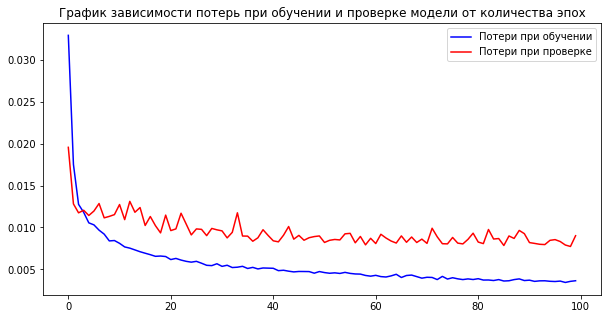

In [11]:
#%matplotlib qt
plot_train_history(history,
                   'График зависимости потерь при обучении и проверке модели от количества эпох')

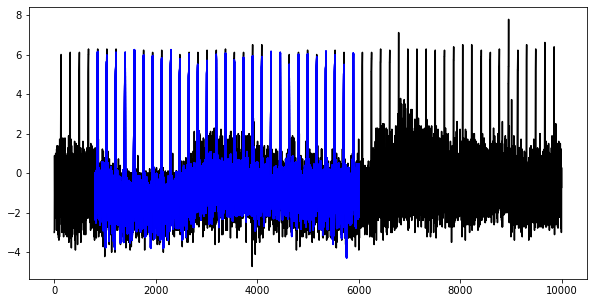

In [12]:
#Построим ретроспективный прогноз
trainPredict = model.predict(xx_tr)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (10, 5))
plt.plot(Ft[:len_f], 'k')
plt.plot(np.r_[n_point:fn_tr],trainPredict, 'b')
plt.show()

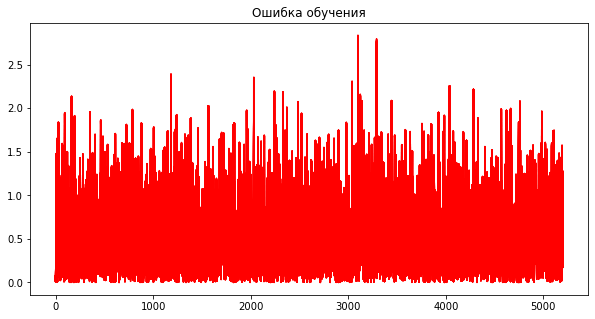

In [13]:
#Ошибка
FF1=np.array(Ft[n_point:fn_tr]).reshape(-1,1)
er1=abs(FF1-trainPredict)
plt.figure(figsize = (10, 5))
plt.plot(er1, 'r')
plt.title('Ошибка обучения')
plt.show()

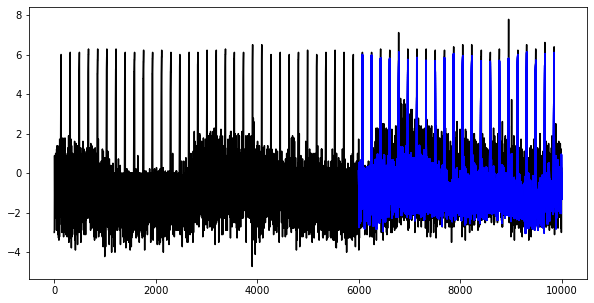

In [14]:
#Строим получившийся тестовый прогноз в нужном масштабе
#%matplotlib qt
testPredict = model.predict(xx_test)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(Ft[:len_f], 'k')
plt.plot(np.r_[fn_tr:len_f],testPredict, 'b')
plt.show()
#cufflinks.go_offline()
#cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)


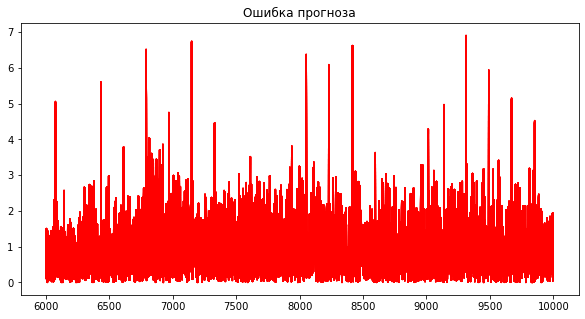

In [15]:
#Ошибка
FF=np.array(Ft[fn_tr:len_f]).reshape(-1,1)
er=abs(FF-testPredict)
plt.figure(figsize = (10, 5))
plt.plot(np.r_[fn_tr:len_f],er, 'r')
plt.title('Ошибка прогноза')
plt.show()


In [16]:
print('Матожидание ошибки обучения = ', round(np.mean(er1),5))
print('СКВО ошибки обучения = ', round(np.std(er1),5))
print('Матожидание ошибки прогноза = ', round(np.mean(er),5))
print('СКВО ошибки прогноза = ', round(np.std(er),5))

Матожидание ошибки обучения =  0.55244
СКВО ошибки обучения =  0.41814
Матожидание ошибки прогноза =  0.90128
СКВО ошибки прогноза =  0.77209


In [17]:
#Скользящее сглаживание по k точкам
def moving_average(series, Date, k):
    f2=[]
    Dt=[]
    N1=int(len(series))
    k1=int((k-1)/2)
    i=k1+1
    while i<= N1-k1:
        tmp=series[i-k1:i+k1]   
        f2.append(np.mean(tmp))
        Dt.append(Date[i])
        i=i+1
    return Dt, f2

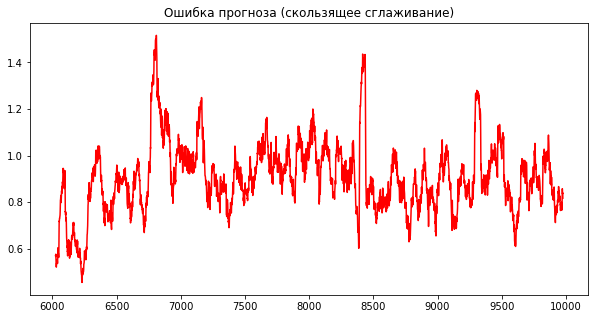

In [18]:
#Скользящее сглаживание ошибки прогноза
[t1,s1] = moving_average(er, np.r_[fn_tr:len_f], 50)
plt.figure(figsize = (10, 5))
plt.plot(t1, s1, 'r')
plt.title('Ошибка прогноза (скользящее сглаживание)')
plt.show()